In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('bank/bank-full.csv',delimiter=';')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Análise de missing values

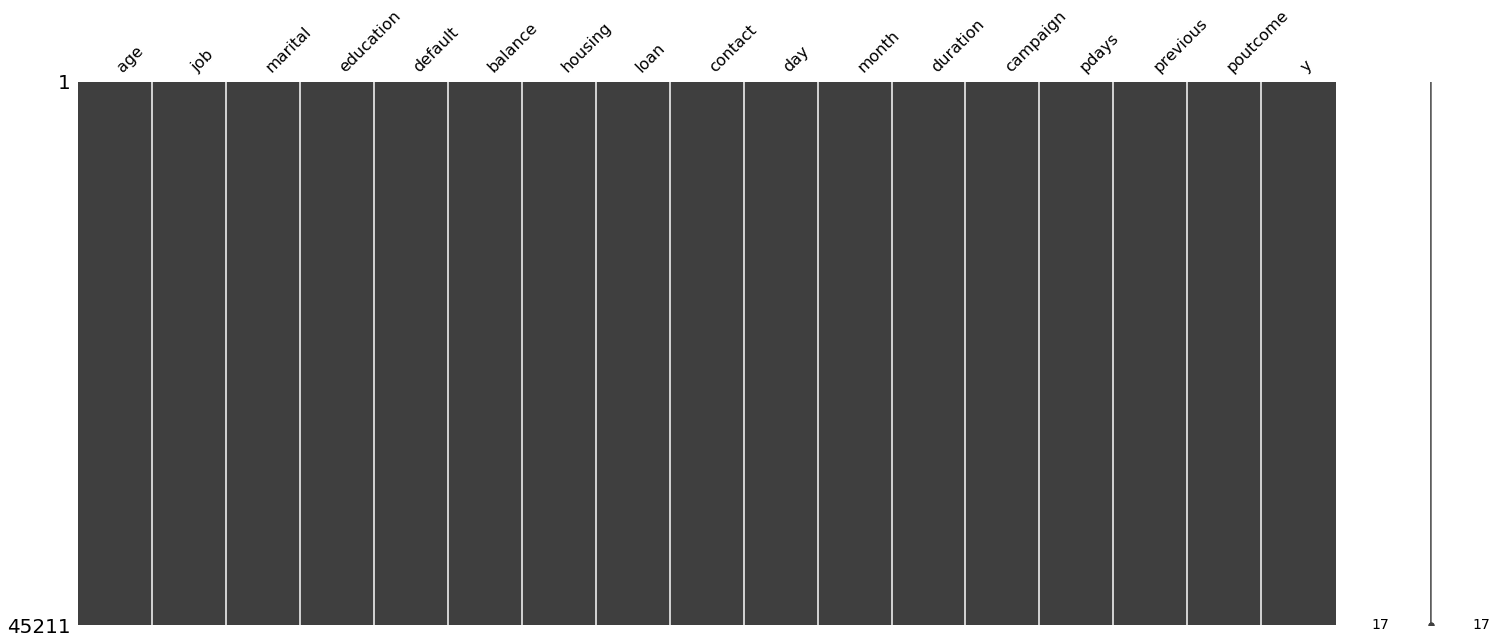

In [8]:
import missingno as msno
msno.matrix(df)

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## QUESTÃO 1

In [133]:
df_loan = pd.DataFrame()
df_loan['yes'] = df[df['loan'] == 'yes']['job'].value_counts()
df_loan['no'] = df[df['loan'] == 'no']['job'].value_counts()
df_loan
# plt.figure(figsize=(17,8))
# df_jobs.plot.bar(title = 'Job and deposit')

,yes,no
blue-collar,1684,8048
technician,1309,6288
management,1253,8205
admin.,991,4180
services,836,3318
entrepreneur,356,1131
retired,309,1955
self-employed,229,1350
housemaid,152,1088
unemployed,109,1194


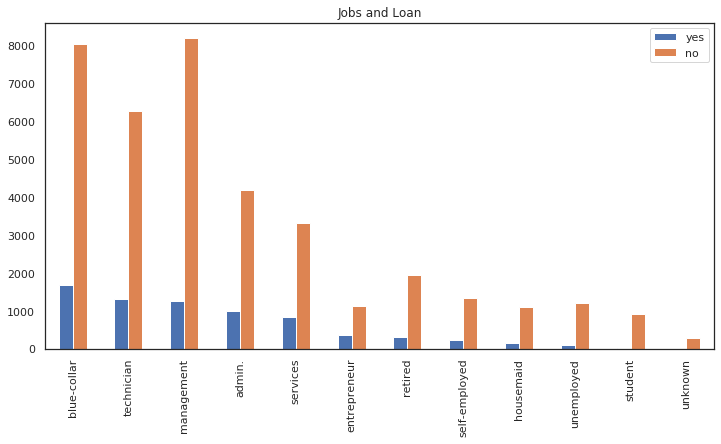

In [137]:
df_loan.plot.bar(title = 'Jobs and Loan',figsize=(12,6))

In [129]:
df_housing = pd.DataFrame()
df_housing['yes'] = df[df['housing'] == 'yes']['job'].value_counts()
df_housing['no'] = df[df['housing'] == 'no']['job'].value_counts()
df_housing

,yes,no
blue-collar,7048,2684
management,4678,4780
technician,4115,3482
admin.,3182,1989
services,2766,1388
entrepreneur,869,618
self-employed,765,814
unemployed,543,760
retired,491,1773
housemaid,398,842


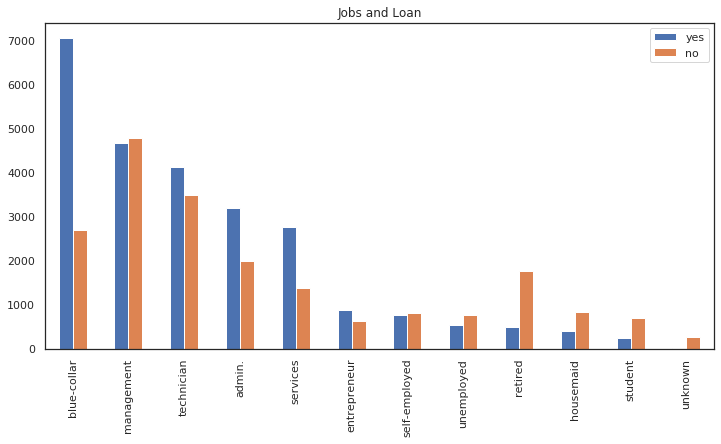

In [138]:
df_housing.plot.bar(title = 'Jobs and Loan',figsize=(12,6))

#### A profissão blue-collar é a que mais tem tendência a fazer um empréstimo, tanto para comprar um imóvel quanto normal

## QUESTÃO 2

In [140]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 <a list of 8 Text yticklabel objects>)

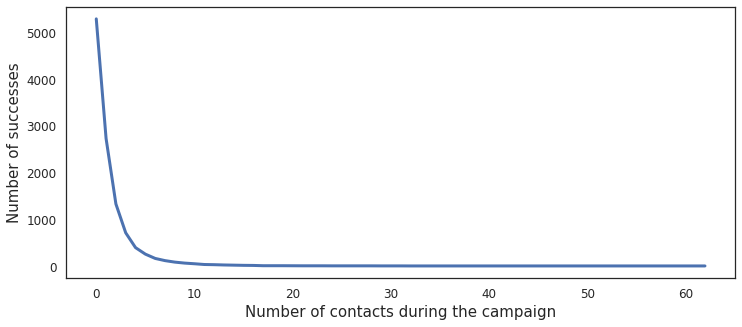

In [241]:
plt.figure(figsize=(12,5))
success = {}
for num in range(0,df['campaign'].max()):
    success[num] = sum(df[df['campaign'] > num]['y'] == 'yes')
plt.plot(list(success.keys()),list(success.values()),linewidth=3)
plt.xlabel('Number of contacts during the campaign', fontsize=15)
plt.ylabel('Number of successes', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### O número de vezes que o banco entrou em contato não possui influência positiva no sucesso da campanha

## QUESTÃO 3